# Decision Tree Classifiers

![](images/cube_tree.pdf)

### Important Considerations


| PROS |  CONS  |
| ---- | -----  |
| Easy to visualize and Interpret |  Prone to overfitting |
| No normalization of Data Necessary |  Ensemble needed for better performance |
| Handles mixed feature types    |    |

### Iris Example


**Use measurements to predict species**


![](images/iris.png)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [74]:
import seaborn as sns
sns.set(style='ticks')

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#split the data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [4]:
#instantiate classifier
clf = tree.DecisionTreeClassifier(max_depth = 2)
clf = clf.fit(X_train, y_train)

In [5]:
#!pip install pydotplus

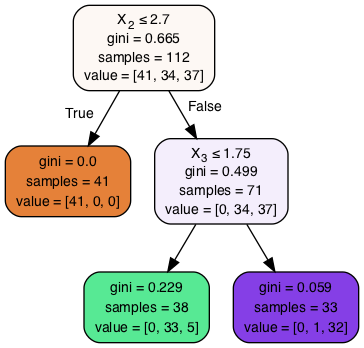

In [7]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Gini Impurity and Entropy

Gini impurity tries to get at the most informative split of the data based on the ratio of class instance($p_{i, k}$) resulting from a given split.  The formula for this is as follows:

$$G_i = 1 - \sum_{i = 1}^n p_{i, k} ~^2$$

### How would specific flower be classified?

If we have a flower that has:

- Sepal.Length = 1.0
- Sepal.Width = 0.3
- Petal.Length = 1.4
- Petal.Width = 2.1

In [8]:
clf.predict_proba([[1.0, 0.3, 1.4, 2.1]])

array([[1., 0., 0.]])

In [9]:
clf.predict([[1.0, 0.3, 1.4, 2.1]])

array([0])

**CART Algorithm**

$$\displaystyle J(k t_k) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m}G_{right}$$

where $G_{left ~or  ~right}$ measures the impurity of the given subest and $m$ is th enumber of instances in that subset.

### Problem

1. Train a `DecisionTreeClassifier` on the titanic dataset aiming to predict the survival of passengers.  Set the max depth to 2.  What does the classifier see as the most important feature?  

2. Compare the performance of the `DecisionTreeClassifier` to that of a `LogisticRegression`.  Compare the performance on both the train and test sets, and describe your findings.

3. `max_depth`: Retrain a `DecisionTreeClassifier` setting the `max_depth` to 3.  Did this change the performance of the classifier?  What effect do you think adjusting this parameter could control for?

4. Remove the `max_depth` parameter and replace with `min_samples_split = 10`.  Train and visualize the results of this classifier.  What has changed here?

5. Explore the `min_samples_split`, `min_samples_leaf`, `min_weight_fraction_leaf`,  `max_leaf_nodes`, and `max_features`.

In [10]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [11]:
titanic.head()
Xb = titanic[['pclass', 'age', 'sibsp','parch','fare']]

In [12]:
titanic = titanic.dropna()
X = titanic[['age','fare', 'parch']]
y = titanic.survived
X_train,X_test, y_train, y_test = train_test_split(X, y)
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

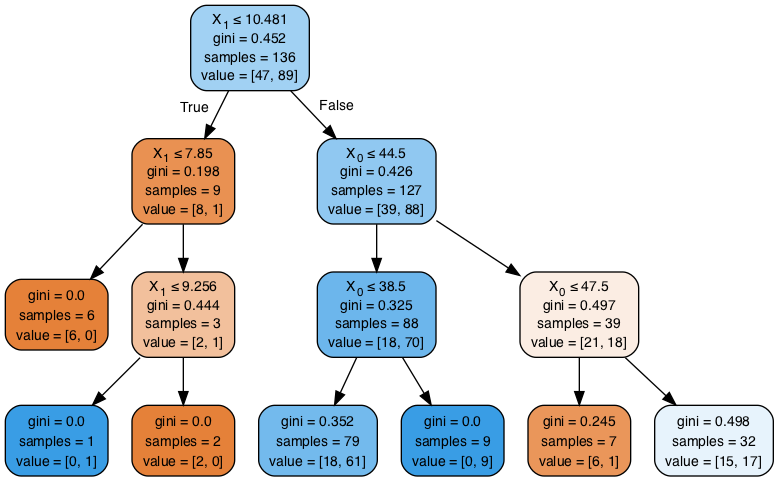

In [13]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [27]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

In [29]:
params = { 
    'max_depth': [2, 3, 4, 5, 6, 7],
    'min_samples_split' : [7, 8, 9, 10, 11, 12, 13]}

In [30]:
grid = GridSearchCV(tree, param_grid=params)

In [31]:
grid.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7], 'min_samples_split': [7, 8, 9, 10, 11, 12, 13]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [32]:
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
bestest = grid.best_estimator_
bestest.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

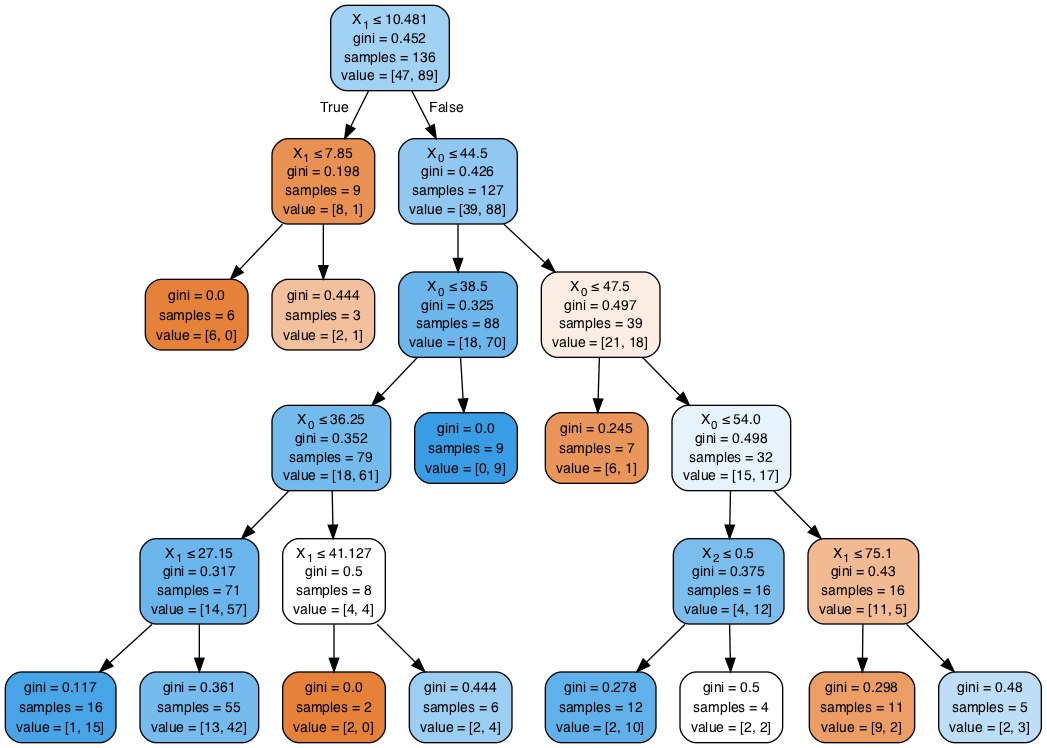

In [34]:
dot_data = StringIO()
export_graphviz(bestest, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [35]:
y_pred = bestest.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.86      0.50      0.63        12
          1       0.85      0.97      0.90        34

avg / total       0.85      0.85      0.83        46



In [36]:
bestest.score(X_test,y_test)

0.8478260869565217

### Feature Importance

In [37]:
clf.feature_importances_

array([0.        , 0.        , 0.61122035, 0.38877965])

In [38]:
def plot_importances(model):
    n_features = iris.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), iris.feature_names)

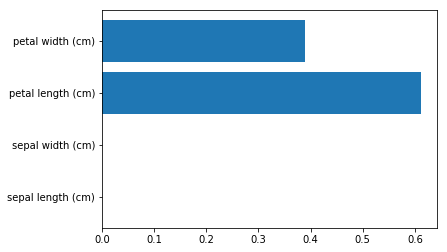

In [39]:
import numpy as np
plot_importances(clf)

### How important are different features?

In [40]:
#list of feature importance
clf.feature_importances_

array([0.        , 0.        , 0.61122035, 0.38877965])

In [41]:
imp = clf.feature_importances_

<Container object of 4 artists>

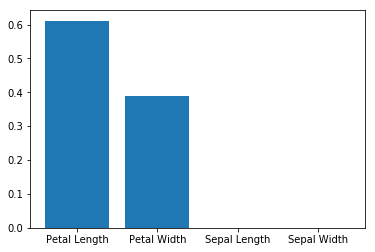

In [42]:
plt.bar(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], imp)

### Confusion Matrix

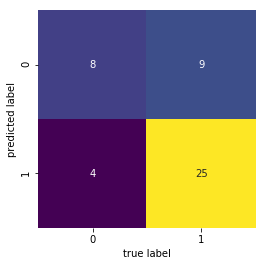

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classifier=clf.fit(X_train,y_train)

predictions=clf.predict(X_test)

mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap = 'viridis', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Cancer Example

- Train `LogisticRegression`, `KNearestNeighbors`, `GaussianNB`, and `DecisionTreeClassifier` models on the cancer data.  Compare their performance in terms of **accuracy**, **precision**, and **f1** score.

- Train a `DecisionTreeClassifier` searching for different values of hyperparameters including the `max_depth`

- Compare your unpruned decision tree to the result of your grid search

- Did these determine different features of import?

In [27]:
from sklearn.datasets import load_breast_cancer

In [28]:
cancer = load_breast_cancer()

In [29]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [30]:
import pandas as pd
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [31]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [33]:
cancer.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
X = cancer.data
y = cancer.target

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
lgr_clf = LogisticRegression()
dtree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
nbclf = GaussianNB()

In [37]:
lgr_clf.fit(X_train, y_train)
dtree.fit(X_train, y_train)
knn.fit(X_train, y_train)
nbclf.fit(X_train, y_train)

GaussianNB(priors=None)

In [38]:
lgr_pred = lgr_clf.predict(X_test)
dtree_pred = dtree.predict(X_test)
knn_pred = knn.predict(X_test)
nbclf_pred = nbclf.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
lr_score = accuracy_score(y_test, lgr_pred)
lr_score

0.951048951048951

In [41]:
dtree_score = accuracy_score(y_test, dtree_pred)

In [42]:
knn_score = accuracy_score(y_test, knn_pred)
nb_score = accuracy_score(y_test, nbclf_pred)

In [43]:
dtree_score


0.8881118881118881

In [44]:
knn_score

0.951048951048951

In [45]:
nb_score

0.9370629370629371

In [46]:
dtree.feature_importances_

array([0.        , 0.02208626, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03793963, 0.00866561,
       0.        , 0.        , 0.        , 0.0180296 , 0.00989497,
       0.0019452 , 0.05298749, 0.69961495, 0.00811332, 0.        ,
       0.00811332, 0.        , 0.11303973, 0.        , 0.01956992])

In [47]:
cancer.data.shape

(569, 30)

### Example with Adolescent Health Data

![](images/addhealthherb.png)

In [44]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.metrics import classification_report
import sklearn.metrics

In [45]:
AH_data = pd.read_csv("data/tree_addhealth.csv")
data_clean = AH_data.dropna()
data_clean.dtypes

BIO_SEX      float64
HISPANIC     float64
WHITE        float64
BLACK        float64
NAMERICAN    float64
ASIAN        float64
age          float64
TREG1        float64
ALCEVR1      float64
ALCPROBS1      int64
marever1       int64
cocever1       int64
inhever1       int64
cigavail     float64
DEP1         float64
ESTEEM1      float64
VIOL1        float64
PASSIST        int64
DEVIANT1     float64
SCHCONN1     float64
GPA1         float64
EXPEL1       float64
FAMCONCT     float64
PARACTV      float64
PARPRES      float64
dtype: object

In [46]:
data_clean.describe()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,...,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,1.521093,0.111038,0.683279,0.236066,0.036284,0.040437,16.493052,0.176393,0.527432,0.369180,...,40.952131,1.618579,0.102514,2.645027,28.360656,2.815647,0.040219,22.570557,6.290710,13.398033
std,0.499609,0.314214,0.465249,0.424709,0.187017,0.197004,1.552174,0.381196,0.499302,0.894947,...,5.381439,2.593230,0.303356,3.520554,5.156385,0.770167,0.196493,2.614754,3.360219,2.085837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.676712,0.000000,0.000000,0.000000,...,18.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,6.300000,0.000000,3.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.254795,0.000000,0.000000,0.000000,...,38.000000,0.000000,0.000000,0.000000,25.000000,2.250000,0.000000,21.700000,4.000000,12.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.509589,0.000000,1.000000,0.000000,...,40.000000,0.000000,0.000000,1.000000,29.000000,2.750000,0.000000,23.700000,6.000000,14.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.679452,0.000000,1.000000,0.000000,...,45.000000,2.000000,0.000000,4.000000,32.000000,3.500000,0.000000,24.300000,9.000000,15.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.512329,1.000000,1.000000,6.000000,...,50.000000,19.000000,1.000000,27.000000,38.000000,4.000000,1.000000,25.000000,18.000000,15.000000


In [57]:
data_clean.head()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
1,2.0,0.0,0.0,1.0,0.0,0.0,19.427397,1.0,1.0,1,...,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
3,1.0,0.0,0.0,1.0,0.0,0.0,20.430137,1.0,0.0,0,...,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
5,1.0,0.0,0.0,1.0,0.0,0.0,14.509589,0.0,0.0,0,...,41.0,3.0,0,0.0,27.0,2.666667,0.0,23.7,3.0,13.0
6,1.0,0.0,0.0,1.0,0.0,0.0,13.676712,0.0,0.0,0,...,42.0,5.0,0,7.0,18.0,2.500000,0.0,24.7,6.0,13.0
7,1.0,0.0,1.0,0.0,0.0,0.0,15.178082,1.0,1.0,0,...,40.0,8.0,1,6.0,20.0,1.500000,0.0,22.3,10.0,14.0


In [47]:
predictors = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'age','ALCEVR1','ALCPROBS1','marever1','cocever1','inhever1','cigavail','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]

targets = data_clean.TREG1

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

print(pred_train.shape, pred_test.shape, tar_train.shape, tar_test.shape)

(2745, 24) (1830, 24) (2745,) (1830,)


In [48]:
#Build model on training data
classifier=DecisionTreeClassifier(max_depth = 2)
classifier=classifier.fit(pred_train,tar_train)
predictions=classifier.predict(pred_test)

sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[1357,  131],
       [ 167,  175]])

In [49]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.8371584699453551

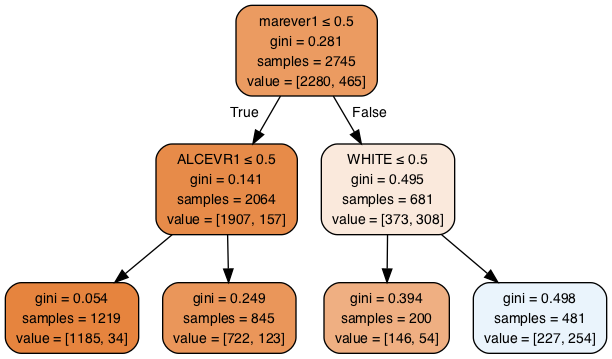

In [50]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


dot_data2 = StringIO()
export_graphviz(classifier, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True, feature_names = list(predictors))
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph2.create_png())

In [51]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.8371584699453551

### Deeper Dive

Let's explore the data around substance abuse more.  For example, let's examine the relationships between other substances and the input predictors.  Do they identify the same primary feature importance? Make sure you limit your tree depth, as it will grow quite deep if you let it.

In [52]:
classifier=DecisionTreeClassifier(max_depth = 5)
classifier=classifier.fit(pred_train,tar_train)
predictions=classifier.predict(pred_test)

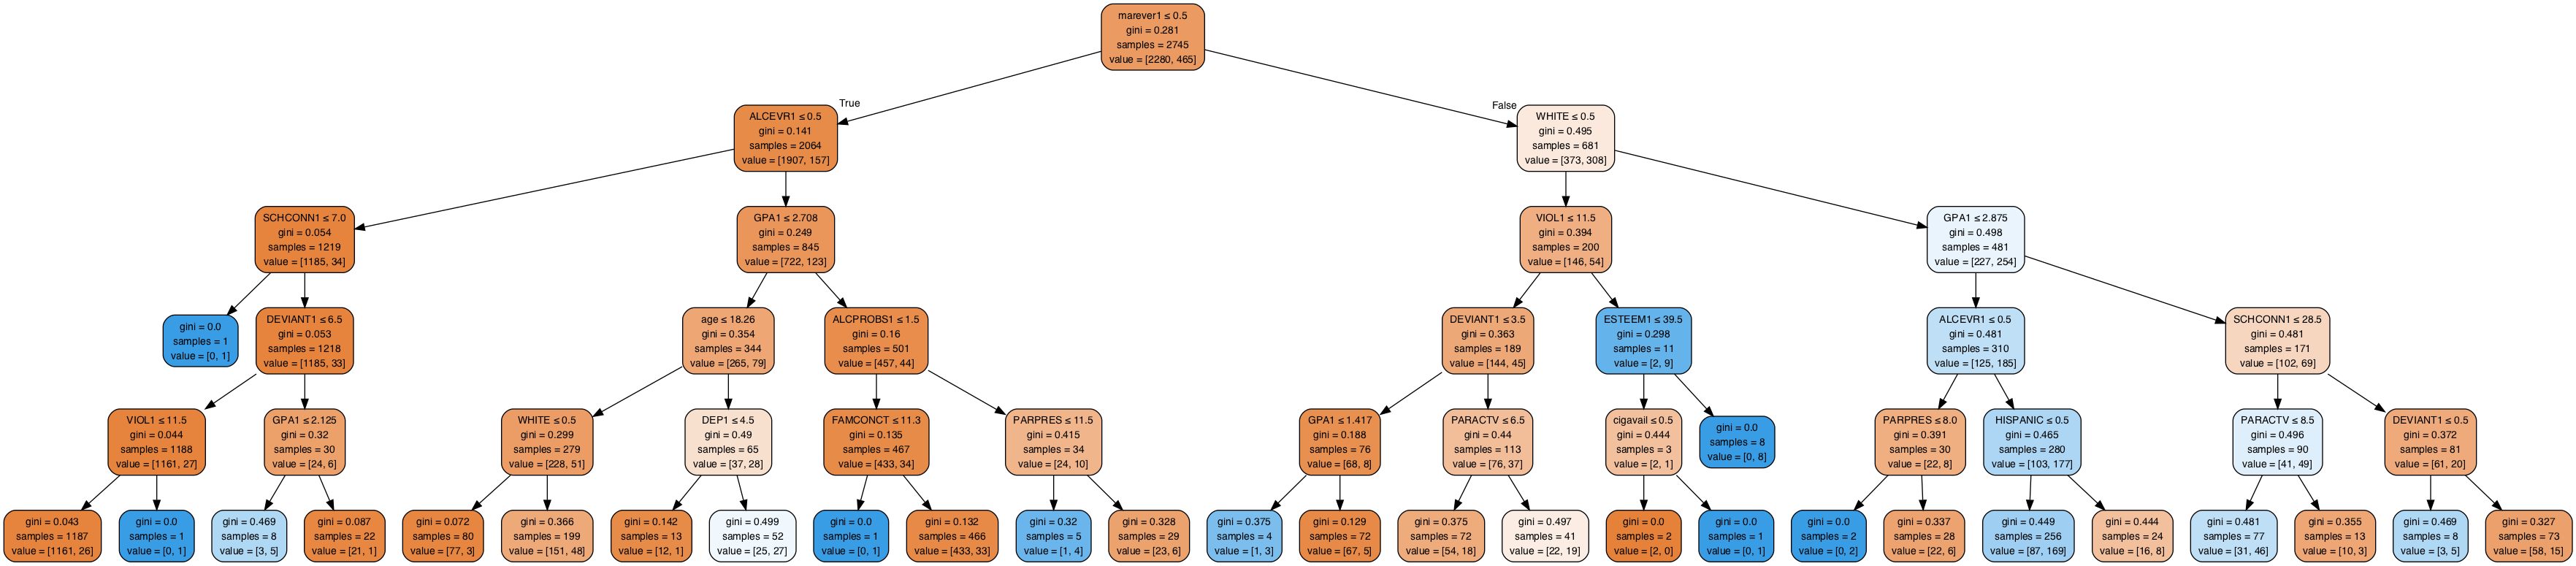

In [53]:
dot_data2 = StringIO()
export_graphviz(classifier, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True, feature_names=predictors.columns)
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph2.create_png())

In [54]:
predictors = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'age','ALCEVR1','ALCPROBS1', 'TREG1','cocever1','inhever1','cigavail','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]

targets = data_clean.marever1

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

print(pred_train.shape, pred_test.shape, tar_train.shape, tar_test.shape)

(2745, 24) (1830, 24) (2745,) (1830,)


In [55]:
classifier=DecisionTreeClassifier(max_depth = 5)
classifier=classifier.fit(pred_train,tar_train)
predictions=classifier.predict(pred_test)

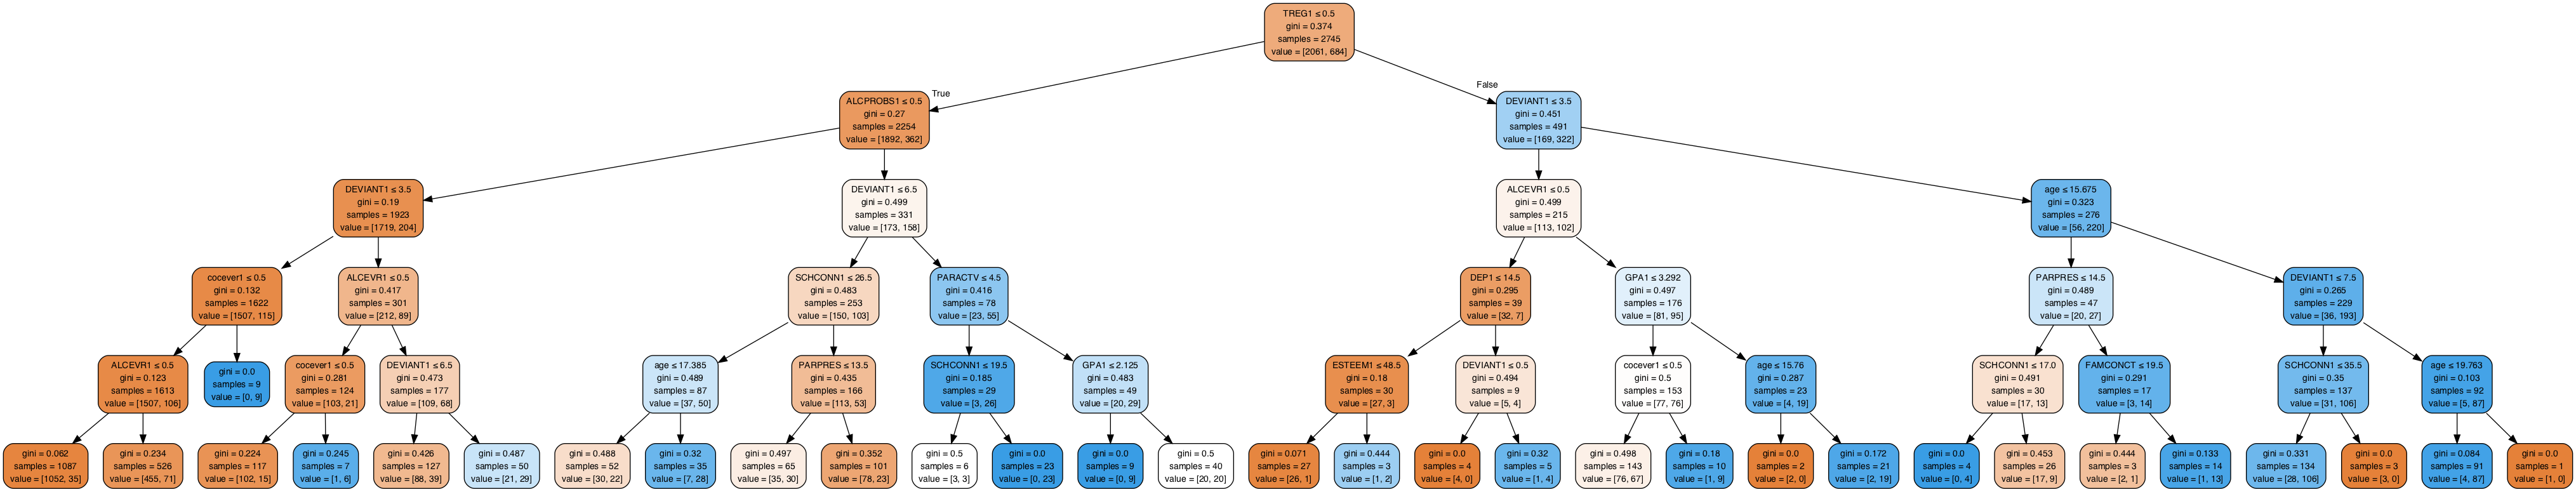

In [56]:
dot_data2 = StringIO()
export_graphviz(classifier, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True, feature_names=predictors.columns)
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph2.create_png())

### futher optimize

In [62]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [65]:
# make pipe
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier())

# set parameters
params = {'decisiontreeclassifier__max_depth': list(range(4,10)),
          'decisiontreeclassifier__min_samples_leaf':list(range(10,20))}

# grid search
grid = GridSearchCV(pipe,param_grid=params)
grid.fit(pred_train,tar_train)

# fit
best = grid.best_estimator_
best.fit(pred_train, tar_train)
best_pred = best.predict(pred_test)

print('accuracy score:',accuracy_score(tar_test,best_pred))
print(classification_report(tar_test,best_pred))

accuracy score: 0.8262295081967214
             precision    recall  f1-score   support

          0       0.87      0.91      0.89      1407
          1       0.65      0.55      0.59       423

avg / total       0.82      0.83      0.82      1830



In [66]:
best

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

### understand feature importance

In [68]:
#list of feature importance
classifier.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03599386, 0.04952798, 0.17129646, 0.4351126 ,
       0.05748439, 0.        , 0.        , 0.00361479, 0.00471064,
       0.        , 0.        , 0.16031782, 0.03623015, 0.01762845,
       0.        , 0.00385236, 0.00744445, 0.01678605])

In [69]:
imp = classifier.feature_importances_

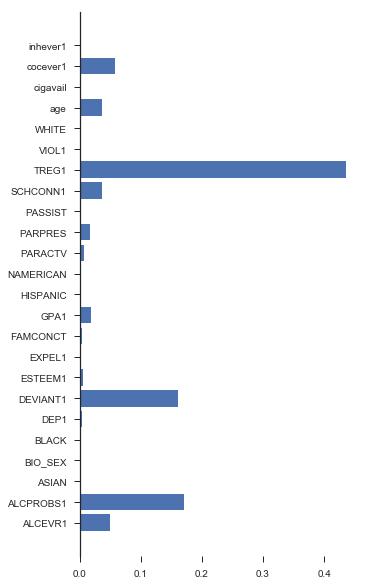

In [76]:
plt.figure(figsize=(5,10))
plt.barh(predictors.columns, imp)
sns.despine(bottom=True)